## Objectives

1. Learn the data science methodology using a project that does not involve advanced statistical methods.

2. Learn to use Python for data science.

3. Be able to ask questions about data and find answers.

## Introduction

Provide a brief introduction to the purpose of this notebook.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

In [3]:
type(df_seattle)

pandas.core.frame.DataFrame

Load the St. Louis data set

In [4]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Explore the contents of the data sets

In [5]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [6]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


## Convert data types, if necessary

### Convert `DATE` to datetime 

In [7]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

In [8]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


Convert the St. Louis `DATE` variable to datetime type.

In [9]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

## Are the data suitable for answering the question?

## Select relevant subsets of the data

In [10]:
df_seattle['PRCP']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.25
        ... 
1653    0.78
1654    0.40
1655    0.03
1656    0.62
1657    0.17
Name: PRCP, Length: 1658, dtype: float64

In [11]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

The St. Louis data set has values for many weather stations, while the Seattle data set has only one weather station. 

We will focus on the data from the airport in St. Louis.

In [12]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

## Identify and deal with missing values

Use the `.info()` method to determine the number of non-null values in each column. Start with the St. Louis data set.

In [13]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


In [14]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

In [15]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


## Join data frames keeping `DATE` and `PRCP` columns

In [16]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

## Create a tidy data frame with columns for city and precipitation

In [17]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

### Rename columns or values to follow best practices

Rename the city values 'STL' and 'SEA'

In [18]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [19]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [20]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [21]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

## Deal with missing values

### Impute missing values

We will replace missing values with the mean across years of values on that day. 


**Design an algorithm for replacing missing values with the mean across years of values on that day.**

In [22]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [23]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,SEA,NaN,9
1835,2018-01-10,SEA,NaN,10
1836,2018-01-11,SEA,NaN,11
1837,2018-01-12,SEA,NaN,12
1838,2018-01-13,SEA,NaN,13
...,...,...,...,...
3368,2022-03-23,SEA,NaN,82
3369,2022-03-24,SEA,NaN,83
3370,2022-03-25,SEA,NaN,84
3371,2022-03-26,SEA,NaN,85


Get the index of each row where precipitation is missing.

In [24]:
indices = np.where(df['precipitation'].isna()==True)[0]

In [25]:
df['day_of_year'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [26]:
pd.DatetimeIndex(df.loc[df['date'] == '2019-03-01', 'date']).day_of_year

Int64Index([60, 60], dtype='int64', name='date')

In [27]:
pd.DatetimeIndex(df.loc[df['date'] == '2020-03-01', 'date']).day_of_year

Int64Index([61, 61], dtype='int64', name='date')

In [28]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

For each missing value, replace it with the mean daily precipitation.

In [29]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

In [30]:
index=indices[0]

In [31]:
mean_day_precipitation.loc[df.loc[index,'day_of_year']]

precipitation    0.1475
Name: 9, dtype: float64

In [32]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


In [33]:
df['month'] = pd.DatetimeIndex(df['date']).month

## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. It is fine to return to modify this step after exploring the data further.

## Export the clean .csv file

In [37]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plots

This plot shows the average amount of rainfall per month without regard to year. From this plot we see that Seattle has more rain and the beginning and end of the year while St. Louis has the most rain in the middle of the year.

Text(0.5, 1.0, 'Average Rain per Month by City')

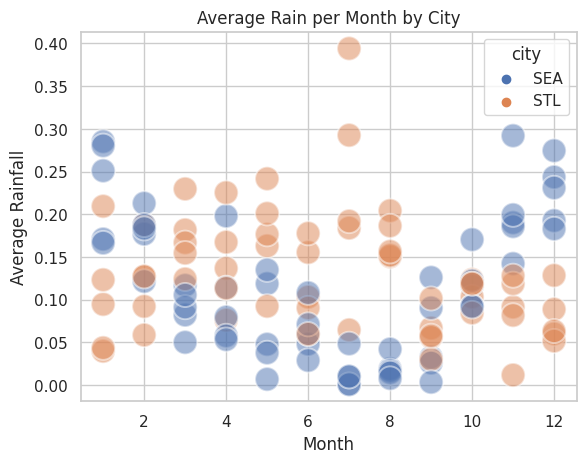

In [35]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
avg_rainfall = df.groupby(['month', 'year', 'city']).mean()
sns.scatterplot(data=avg_rainfall, x='month', y='precipitation', hue='city', s=300, alpha = 0.5)
plt.xlabel("Month")
plt.ylabel("Average Rainfall")
plt.title("Average Rain per Month by City")

This plot shows the ratio of days that get no rain in a month. As we say from before we see that seattle does not have many dry days at the beginning and end of the year while St. Louis has more rain near the middle of the year.

Text(0.5, 1.0, 'Ratio of Days With No Rain by City')

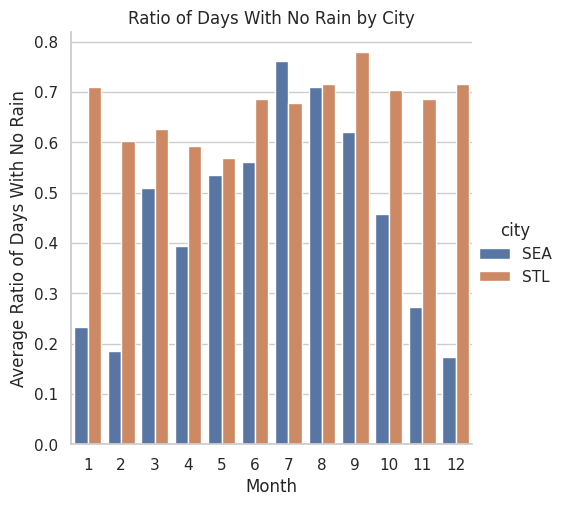

In [36]:
df['zero_precip'] = df['precipitation'] == 0

df_grouped = df.groupby(['city', 'month'])['zero_precip'].mean().reset_index()

sns.catplot(data=df_grouped, x='month', y='zero_precip', hue='city', kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Ratio of Days With No Rain")
plt.title("Ratio of Days With No Rain by City")